# Bolsa de bolas
https://www.youtube.com/watch?v=Gwjbadd3W9Q

Tenemos una bolsa con
- 8 bolas rojas
- 3 bolas blancas
- 9 bolas azules

Calcular la probabilidades de:

In [455]:
bolsa = []
bolsa.extend([1 for i in range(8)]) # 1 roja
bolsa.extend([2 for i in range(3)]) # 2 blanca
bolsa.extend([3 for i in range(9)]) # 3 azul
bolsa

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]

[]

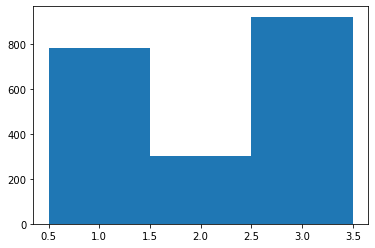

In [456]:
import random
import math
import matplotlib.pyplot as plt
bolas = [bolsa[math.floor(random.random()*len(bolsa))] for i in range(2000)]
plt.hist(bolas,bins=[i+1 for i in range(4)],align='left')
plt.plot()

In [457]:
import pandas as pd
df = pd.DataFrame(bolas,columns=['bolas'])
df.tail()

,bolas
1995,3
1996,1
1997,3
1998,2
1999,3


In [458]:
df.loc[:,'repeticiones']=1
df.tail()

,bolas,repeticiones
1995,3,1
1996,1,1
1997,3,1
1998,2,1
1999,3,1


In [459]:
df = df.groupby('bolas').count()
df

,repeticiones
bolas,
1,780
2,300
3,920


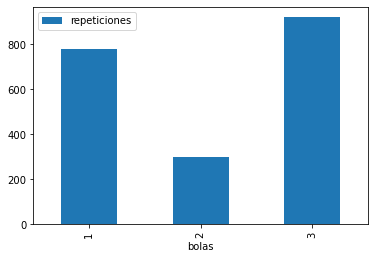

In [460]:
df.plot.bar()

In [461]:
bolas1=list(bolas)
bolas2=[]
bolas3=[]
for i in range(len(bolas1)):
    bolsa2=list(bolsa)
    bolsa2.pop(bolsa.index(bolas1[i]))
    bolas2 = [bolsa2[math.floor(random.random()*len(bolsa2))] for i in range(len(bolas1))]
    bolsa3=list(bolsa2)
    bolsa3.pop(bolsa2.index(bolas2[i]))    
    bolas3 = [bolsa3[math.floor(random.random()*len(bolsa3))] for i in range(len(bolas1))]

###  a) Extraer 3 bolas blancas

In [462]:
# P( B1 y B2 y B3)
3/20 * 2/19 * 1/18

0.0008771929824561404

In [463]:
# P( B1 y B2 y B3 )
len(
    [i for i in range(len(bolas1)) if bolas1[i]==2 and bolas2[i]==2 and bolas3[i]==2]
)/len(bolas1)

0.004

### Extraer una bola blanca en la primera extración

In [464]:
# P(B1)
3/20

0.15

In [465]:
# P(B1)
len(
    [i for i in range(len(bolas1)) if bolas1[i]==2 ]
)/len(bolas1)

0.15

### Extraer una bola roja

In [466]:
# P(R1)
8/20

0.4

In [467]:
# P(R1)
len(
    [i for i in range(len(bolas1)) if bolas1[i]==1 ]
)/len(bolas1)

0.39

### Extraer dos bolas blancas consecutivas

In [468]:
# P(B1 y B2)
3/20*2/19

0.015789473684210527

In [469]:
# P(B1 y B2)
len(
    [i for i in range(len(bolas1)) if bolas1[i]==2 and bolas2[i]==2]
)/len(bolas1)

0.025

### Extraer dos bolas rojas consecutivas

In [470]:
# P(R1 y R2)
8/20*7/19

0.1473684210526316

In [471]:
# P(B1 y B2)
len(
    [i for i in range(len(bolas1)) if bolas1[i]==1 and bolas2[i]==1]
)/len(bolas1)

0.156

###  Extraer 3 bolas rojas consecutivas

In [472]:
# P(R1 y R2 y R3)
8/20*7/19*6/18

0.04912280701754387

In [473]:
# P(B1 y B2 y B3)
len(
    [i for i in range(len(bolas1)) if bolas1[i]==1 and bolas2[i]==1 and bolas3[i]==1]
)/len(bolas1)

0.0575

### b) 2 rojas y 1 blanca, sin importar el orden

In [474]:
# P(RRB)
3*(8/20*7/19*3/18)

0.0736842105263158

In [475]:
# P(RRB)
len(
    [i for i in range(len(bolas1)) if  (bolas1[i]==2 and bolas2[i]==1 and bolas3[i]==1)
                                    or (bolas1[i]==1 and bolas2[i]==2 and bolas3[i]==1)
                                    or (bolas1[i]==1 and bolas2[i]==1 and bolas3[i]==2)
    ]
)/len(bolas1)

0.0815

### c) Que salgan en el orden rojo, blanco y azul

In [476]:
# P(R1 y B2 y A3)
8/20*3/19*9/18

0.03157894736842106

In [477]:
len(
    [i for i in range(len(bolas1)) if  bolas1[i]==1 and bolas2[i]==2 and bolas3[i]==3 ]
)/len(bolas1)

0.0265

### d) Que salga alguna blanca

In [496]:
# P(B1 o B2 o B3) - P(B1 y B2) - P(B1 y B3) - P(B2 y B3) + P(B1 y B2 y B3)
3/20+3/19+3/18 - 3*3/20*2/19*17/18 + 3/20*2/19*1/18 # ¡¡Nooooo!!

0.4307017543859648

In [479]:
3*3/20*17/19*16/18 + 3*3/20*2/19*17/18 + 3/20*2/19*1/18

0.4035087719298246

In [480]:
# También 1-P(B1' y B2' y B3')
1-17/20*16/19*15/18

0.4035087719298246

In [481]:
len(
    [i for i in range(len(bolas1)) if  bolas1[i]==2 or bolas2[i]==2 or bolas3[i]==2 ]
)/len(bolas1)

0.4065

### e) 1 de cada color, sin importar el orden

In [482]:
# P(RBA)
3*2*(8/20*3/19*9/18) # 6 variaciones (sí importa el orden) sin repetición de 3 elementos de 3 en 3: VSR(3,3)=3!/(3-3)!=3*2*1

0.18947368421052635

In [483]:
len(
    [i for i in range(len(bolas1)) if   bolas1[i]!=bolas2[i] 
                                    and bolas2[i]!=bolas3[i] 
                                    and bolas1[i]!=bolas3[i]
    ]
)/len(bolas1)

0.1655